<a href="https://colab.research.google.com/github/NupurGour654/NupurGour654/blob/main/AI_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



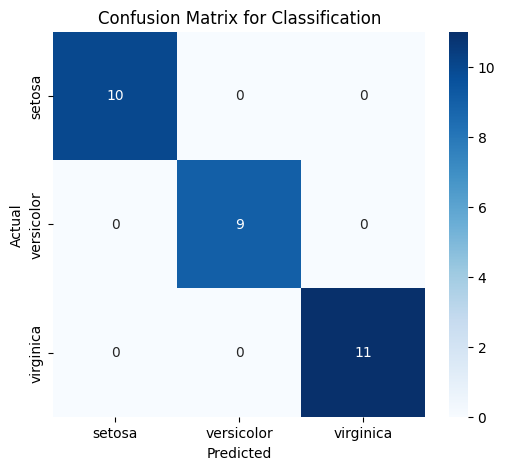

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Regression Metrics:
MSE: 0.2859
R² Score: 0.7818


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_california_housing

# ---------------- Classification Task (Iris Dataset) -----------------
# Load dataset
iris = load_iris()
X_class = iris.data
y_class = iris.target

# Encode categorical target
y_class_encoded = keras.utils.to_categorical(y_class, num_classes=3)

# Split dataset
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class_encoded, test_size=0.2, random_state=42)

# Normalize input features
scaler_c = StandardScaler()
X_train_c = scaler_c.fit_transform(X_train_c)
X_test_c = scaler_c.transform(X_test_c)

# Build MLP model for classification
model_c = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train_c.shape[1],)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # Output layer for 3 classes
])

model_c.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model_c.fit(X_train_c, y_train_c, epochs=50, batch_size=5, verbose=0)

# Predict and evaluate
y_pred_c = np.argmax(model_c.predict(X_test_c), axis=1)
y_test_labels = np.argmax(y_test_c, axis=1)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_c))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_labels, y_pred_c), annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Classification')
plt.show()

# ---------------- Regression Task (California Housing Dataset) -----------------
# Load dataset
housing = fetch_california_housing()
X_reg = housing.data
y_reg = housing.target

# Split dataset
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Normalize input features
scaler_r = StandardScaler()
X_train_r = scaler_r.fit_transform(X_train_r)
X_test_r = scaler_r.transform(X_test_r)

# Build MLP model for regression
model_r = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train_r.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)  # Single output neuron for regression
])

model_r.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train model
model_r.fit(X_train_r, y_train_r, epochs=50, batch_size=10, verbose=0)

# Predict and evaluate
y_pred_r = model_r.predict(X_test_r)

print("\nRegression Metrics:")
print(f"MSE: {mean_squared_error(y_test_r, y_pred_r):.4f}")
print(f"R² Score: {r2_score(y_test_r, y_pred_r):.4f}")
